# Nubes de palabras - Programas Presidenciales Chile 2017
Códigos con que se generaron Nubes de Palabras.
Se requieren Módulos NLTK, WordCloud
Detalles metodológicos y resultados se pueden ver en el [Artículo en MEDIUM AQUI](https://medium.com/@MGuevaraA/c%C3%B3mo-son-los-programas-presidenciales-si-visualizamos-sus-palabras-m%C3%A1s-relevantes-81e5a14415e)

## Obtener el texto de cada programa

In [38]:
def get_text(candidato):
    import codecs
    f = codecs.open("DATA/"+candidato+".txt", encoding="UTF-8")
    text = f.read()
    return text

#funcion no utilizada en version final, por incompatibilidad de caracteres
def get_text_pdf(archivo):
    import textract #install previously
    if archivo == "goic" or archivo == "guillier":
        
        archivo+=".txt"
        
    else:
        archivo+=".pdf"
    text = textract.process(archivo, encoding="utf_8")
    return text

## Procesa texto

In [39]:
def proc_text(texto, candidat):
    import nltk
    from nltk.corpus import stopwords
    mas_stopwords = {"MA","ma","que","en","LA", "el" "más","pág","página","pág.","etc"}
    texto_l = texto.lower()
    #cuida no procesar palabra chilenos o chilenas
    texto_l = texto_l.replace("chilenos", "XXXXX")
    texto_l = texto_l.replace("chile", candidat)
    texto_l = texto_l.replace("XXXXX", "chilenos")
    
    filtered_words = [word for word in texto_l.split() if word not in stopwords.words('spanish') and word not in mas_stopwords]


    return filtered_words

## Crea nubes de texto y obtiene frecuencias

In [40]:
#tf y plot nubes de frecuencias
def word_cloud(texto, candidat):
    from wordcloud import WordCloud
    from wordcloud import WordCloud, STOPWORDS
    from os import path, getcwd
    d= getcwd()
  
    import matplotlib.pyplot as plt
 
    # lower max_font_size
    wordcloud = WordCloud(background_color="black",normalize_plurals=False,max_font_size=200, max_words=300, width=1000, height=600).generate(texto)
    wordcloud.to_file(path.join(d, 'IMAGES_TF',candidat+".png"))
    #print max(wordcloud.words_.values())
    #print wordcloud.layout_
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
  
    return wordcloud.words_ #retorna tf normalizado

#tf-idf y plot palabras relevantes
def word_cloud_freq(candidat, dicc):
    from wordcloud import WordCloud
    from wordcloud import WordCloud, STOPWORDS
    from os import path, getcwd
    d= getcwd()
   
    import matplotlib.pyplot as plt
    dicc[candidat+"+"]= dicc[candidat]
    del dicc[candidat]
    
    # lower max_font_size
    wordcloud = WordCloud(background_color="black",normalize_plurals=False,max_font_size=200, width=1000, height=600).generate_from_frequencies(dicc)
    wordcloud.to_file(path.join(d, 'IMAGES_TF_IDF',candidat+".png"))
    #print max(wordcloud.words_.values())
    #print wordcloud.layout_
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## Programa principal

GOIC


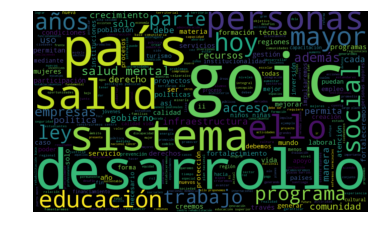

KAST


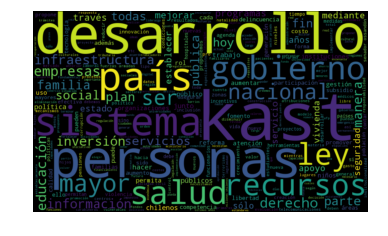

PIÑERA


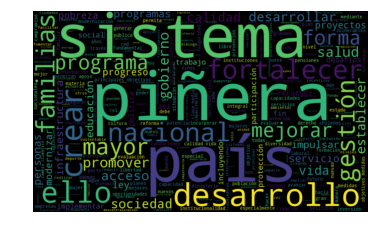

GUILLIER


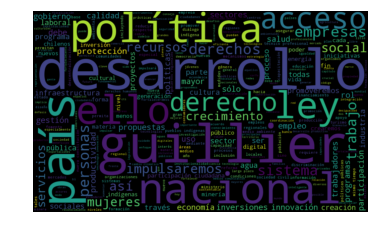

SÁNCHEZ


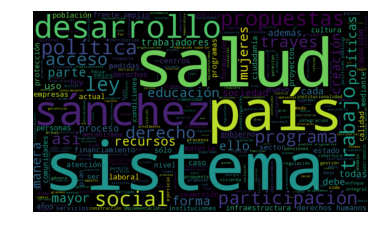

ENRÍQUEZOMINAMI


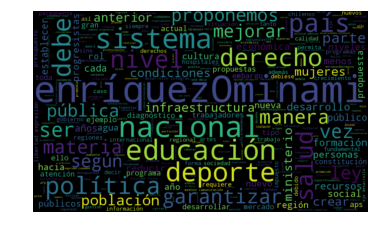

ARTÉS


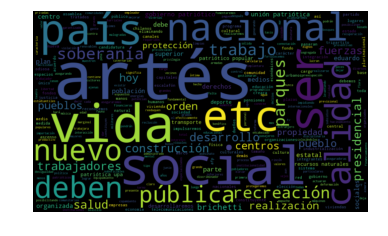

NAVARRO


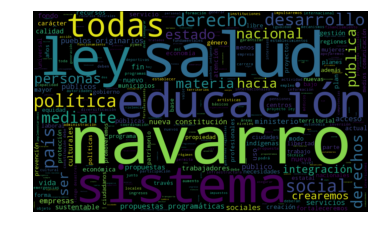

In [41]:
candidatos = ["goic","kast",u"piñera","guillier",u"sánchez",u"enríquezOminami",u"artés","navarro"]
dicc = {} #acumular diccionario de candidatos
for candidato in candidatos:
    print candidato.upper()
    text = get_text(candidato)
    #text = get_text_pdf(candidato) #version antigua
    text = proc_text(text, candidato)
    text = " ".join(text)
    #print text[:100]
    d_tf = word_cloud(text, candidato)
    #guardar aqui csv
    dicc[candidato] = d_tf


SÁNCHEZ


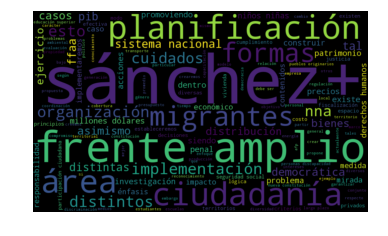

ARTÉS


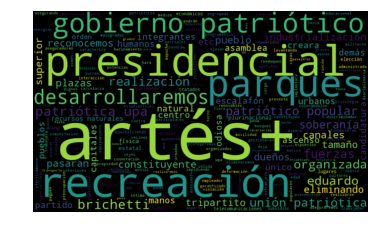

GUILLIER


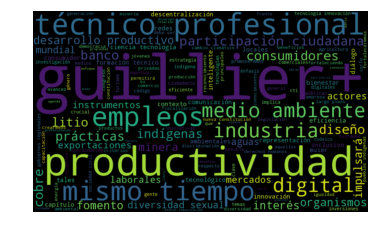

KAST


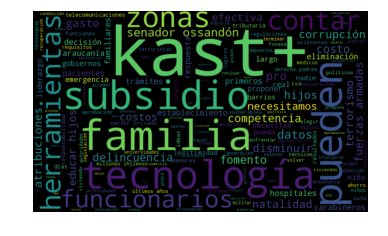

NAVARRO


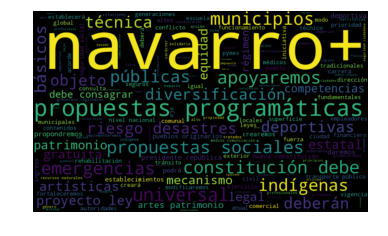

GOIC


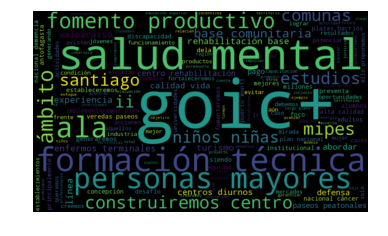

ENRÍQUEZOMINAMI


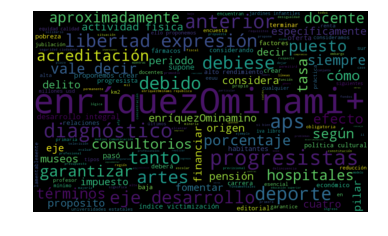

PIÑERA


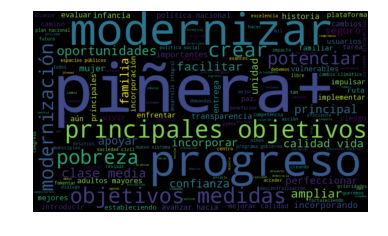

In [42]:
# Encontrando diferencias, con el uso de Tf iDF
#len(dicc[u'kast'])
idf = {}
#print dicc
#document frequency
for can_dicc in dicc.values():
    for word in can_dicc:
        if word not in idf:
            idf[word] = 0
        idf[word]+=1
#get IDF       
from math import log
for word in idf:
    #print "len " , len(dicc)
    #print "idf", idf[word]
    idf[word] = log(len(dicc)/idf[word])
    
dic_final = {}
for cand, tf in dicc.items():
    can_dicc = {}
    for word in tf:
        if idf[word] != 0:
            can_dicc[word] = tf[word]*idf[word]
    dic_final[cand]= can_dicc
    
#plot wordClouds2
for cand in dic_final:
    print cand.upper()
    word_cloud_freq(cand,dic_final[cand])

## Exporta archivos de frecuencias


In [43]:
#tf
import codecs
ar_tf = codecs.open("CSV_TF/TF_TOTAL.csv", "w", encoding="UTF-8")

for cand, tf in dicc.items():
    ar_cand = codecs.open("CSV_TF/TF_"+cand+".csv", "w", encoding="UTF-8")
    lista = tf.items()
    lista.sort(key=lambda tup: tup[1])
    lista.reverse()
    for word,freq in lista:
        t_f = word + u","+str(freq)+"\n"
        ar_tf.write(cand+","+t_f)
        ar_cand.write(t_f)
    ar_cand.close()
ar_tf.close()

print "Archivos CSV de Term Frequency creados..."

#idf
ar_idf = codecs.open("CSV_TF_IDF/TF_IDF_TOTAL.csv", "w", encoding="UTF-8")

for cand, idf in dic_final.items():
    ar_cand = codecs.open("CSV_TF_IDF/TF_IDF_"+cand+".csv", "w", encoding="UTF-8")
    lista = idf.items()
    lista.sort(key=lambda tup: tup[1])
    lista.reverse()
    for word,freq in lista:
        t_f = word + u","+str(freq)+"\n"
        ar_idf.write(cand+","+t_f)
        ar_cand.write(t_f)
    ar_cand.close()
ar_idf.close()
print "Archivos CSV de Tf Inverse Document Frequency creados..."

Archivos CSV de Term Frequency creados...
Archivos CSV de Tf Inverse Document Frequency creados...
